# **Master Feature Selection Part 1: Filter Methods**

![alt text](1_uc_wt_Luk5BVnZxU2M36Ug.jpg)

Filter methods are a type of feature selection method that works by selecting features based on some criteria prior to building the model. Because they don’t involve actually testing the subsetted features using a model, they are computationally inexpensive and flexible to use for any type of machine learning algorithm. This makes filter methods an efficient initial step for narrowing down the pool of features to only the most relevant, predictive ones.

There are many different filter methods that can be used for evaluating and selecting features. we will use variance thresholds, correlation, and mutual information to rank and select the top features.

In [2]:
# let's create a simple dataset to show the filter methods in action

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
data = {
    'hours_study': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 5, 4],
    'grade': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'Age':[30, 50,40, 15, 18, 12, 33, 40, 20, 24],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
}

df = pd.DataFrame(data)
df.head()

,hours_study,hours_sleep,grade,hours_TV,Age,height_cm,exam_score
0,1,10,6,4,30,155,71
1,2,10,6,3,50,151,72
2,3,8,6,4,40,160,78
3,4,8,6,3,15,160,79
4,5,6,6,2,18,156,85


In [3]:
X = df.drop(columns = ['exam_score'])
y = df['exam_score']

### **A. Variance threshold**


Removes features with low variance (i.e., features that don’t change much).

In [4]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0)

X_var = var_thresh.fit_transform(X)

# convert the array to a dataframe

X_var_df = pd.DataFrame(X_var, columns = X.columns[var_thresh.get_support()])
X = X_var_df
X_var_df.head()

,hours_study,hours_sleep,hours_TV,Age,height_cm
0,1,10,4,30,155
1,2,10,3,50,151
2,3,8,4,40,160
3,4,8,3,15,160
4,5,6,2,18,156


as we can see that the grade column has a variance of 0, so it is removed

### **B. Pearson’s correlation**

Another type of filter method involves finding the correlation between variables. In particular, the Pearson’s correlation coefficient is useful for measuring the linear relationship between two numeric, continuous variables — a coefficient close to 1 represents a positive correlation, -1 represents a negative correlation, and 0 represents no correlation. Like variance, Pearson’s correlation coefficient cannot be calculated for categorical variables.

There are 2 main ways of using correlation for feature selection — to detect correlation between features and to detect correlation between a feature and the target variable.


#### **1.Correlation between features**

When two features are highly correlated with one another, then keeping just one to be used in the model will be enough because otherwise they provide duplicate information. The second variable would only be redundant and serve to contribute unnecessary noise.

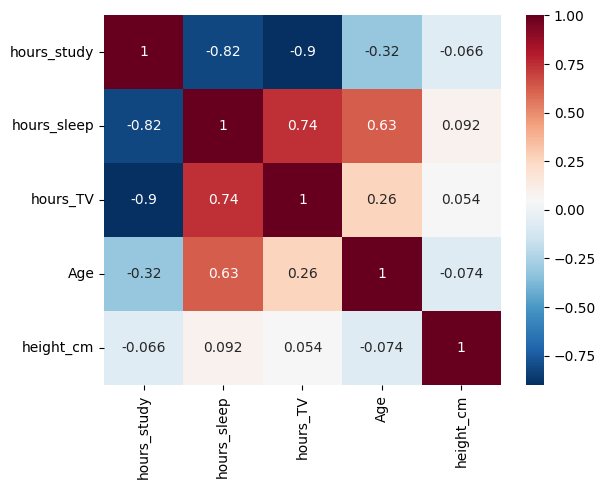

In [5]:
corr = X.corr(method='pearson')
sns.heatmap(corr,annot=True, cmap='RdBu_r')
plt.show()

hours_tv column appears to be highly negatively correlated with the hours_study  Because they provide redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target. This is explored in the next section.

#### **2. Correlation between feature and target**

the second way correlation can be used is to determine if there is a relationship between a feature and the target variable. In the case of Pearson’s correlation, this is especially useful if we intend to fit a linear model, which assumes a linear relationship between the target and predictor variables. If a feature is not very correlated with the target variable, such as having a coefficient of between -0.3 and 0.3, then it may not be very predictive and can potentially be filtered out.

<Axes: >

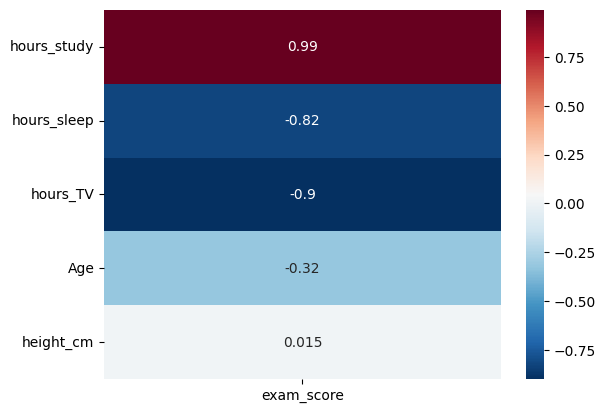

In [6]:
X['exam_score'] = df['exam_score']

corr_target = X.corr(method='pearson')['exam_score'].drop(labels=['exam_score'])

sns.heatmap(corr_target.to_frame(),annot=True, cmap='RdBu_r')

As seen, hours_study is positively correlated with exam_score and hours_TV is negatively correlated with it. It makes sense that hours_study and hours_TV would be negatively correlated with each other as we saw earlier, and just one of those features would suffice for predicting exam_score. Since hours_study has a stronger correlation with the target variable, let’s remove hours_TV as the redundant feature:

In [7]:
X = X.drop(columns=['hours_TV'])
X.head()

,hours_study,hours_sleep,Age,height_cm,exam_score
0,1,10,30,155,71
1,2,10,50,151,72
2,3,8,40,160,78
3,4,8,15,160,79
4,5,6,18,156,85


### **C. Mutual information**

The final filter method we’ll look at is using mutual information to rank and select the top features. Mutual information is a measure of dependence between two variables and can be used to gauge how much a feature contributes to the prediction of the target variable. It is similar to Pearson’s correlation, but is not limited to detecting linear associations. This makes mutual information useful for more flexible models where a linear functional form is not assumed. Another advantage of mutual information is that it also works on discrete features or target, unlike correlation. Although, categorical variables need to be numerically encoded first.

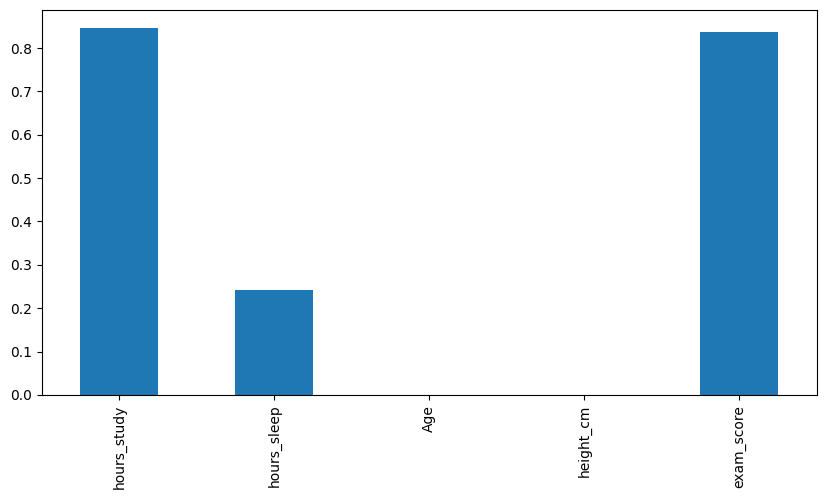

In [8]:
# X = X.drop(columns=['exam_score'])

from sklearn.feature_selection import mutual_info_regression # this for regression problems
from sklearn.feature_selection import mutual_info_classif # this for classification problems

mi = mutual_info_regression(X, y)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)

mi.plot.bar(figsize=(10, 5))
plt.show()

In [9]:
# let's use the SelectKBest method to select the top 3 features

from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_regression, k=3)
x_new = selector.fit_transform(X,y)
x_new = pd.DataFrame(x_new, columns = X.columns[selector.get_support()])
x_new.head()



,hours_study,hours_sleep,exam_score
0,1,10,71
1,2,10,72
2,3,8,78
3,4,8,79
4,5,6,85


because the hours_sleep and height_cm have the lowest mutual information with the exam_score, we can drop them

### **Summary**

In our example dataset, we started out with 6 features for predicting the exam_score of students. Using various filter methods, we narrowed down that set to just the top most relevant and informative ones. First, we eliminated grade_level because it has zero variance and would contribute nothing to the model. Then, we dropped hours_TV since it is highly correlated with hours_study and is therefore redundant. Lastly, we filtered out height_cm based on mutual information, which suggested that it does not have any meaningful association with the target variable, linear or otherwise, and would not have been very predictive.